In [17]:
from mnist import load_mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train, vadidation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [4]:
train[0].shape, train[1].shape

((55000, 28, 28, 1), (55000,))

In [5]:
train[1]

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'пример цифры 7')

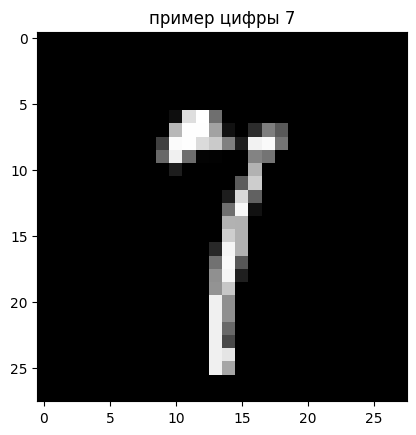

In [6]:
n = 4235
plt.imshow(train[0][n], cmap='gray')
plt.title('пример цифры ' + str(train[1][n]))

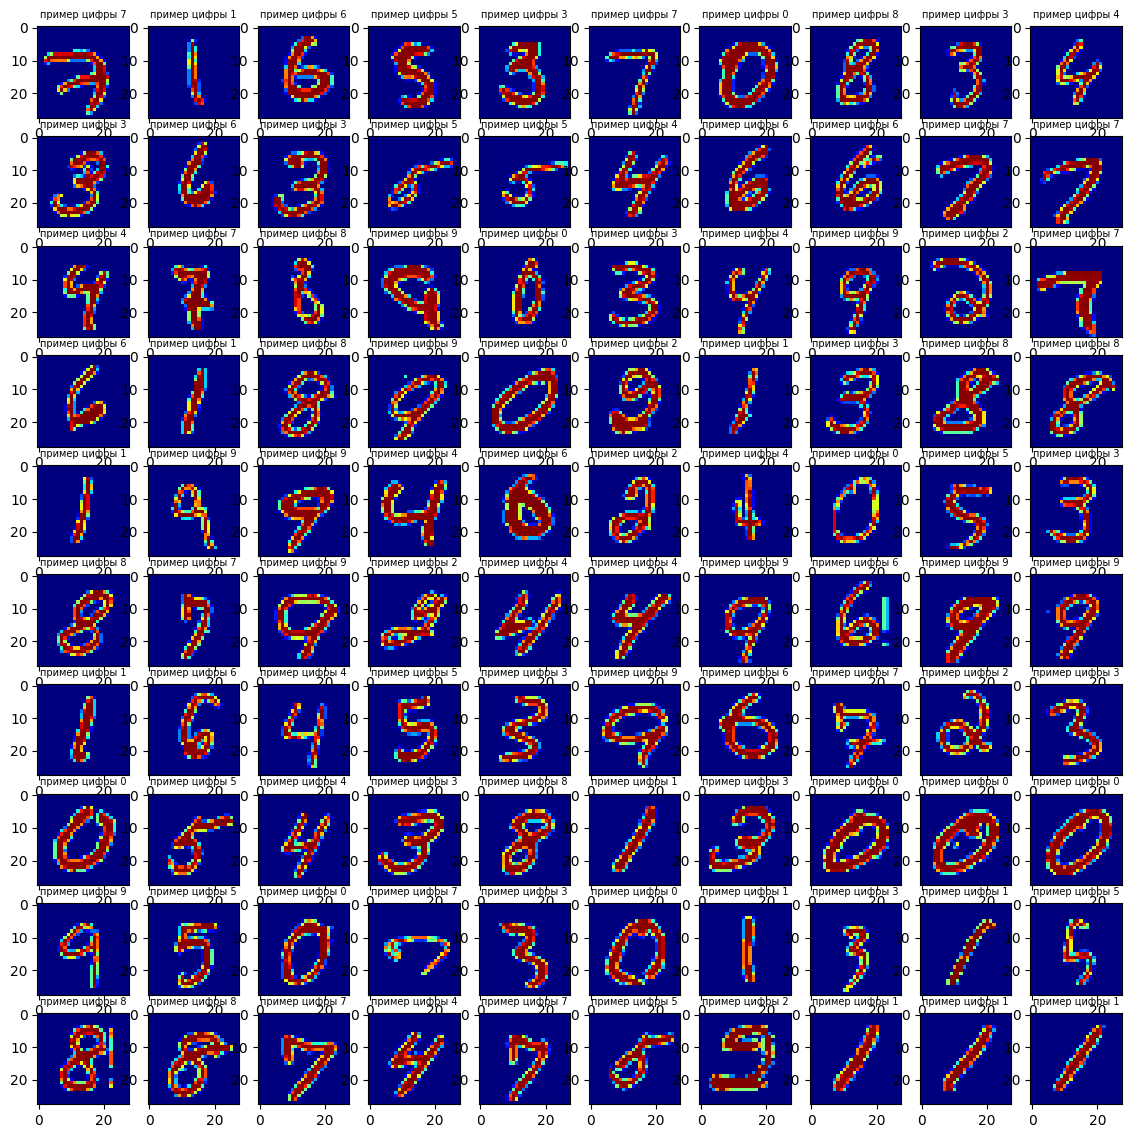

In [11]:
fig, axs = plt.subplots(10, 10, figsize=(14, 14))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(train[0][i+20*j], cmap='jet')
        axs[i, j].set_title('пример цифры ' + str(train[1][i+20*j]), fontdict = {'fontsize':7})    

In [12]:
train[0].shape

(55000, 28, 28, 1)

In [13]:
train[0].reshape(55000, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
class PCA(): 
    def __init__(self, n_components=None): 
        self.n_components = n_components
     
    def fit(self, X): 
        Y = np.zeros((28,28))
        Y[:,:] = X[:,:,0]
        Y_mean = np.mean(Y, axis = 1)
        Y -= Y_mean 
        C = Y.T.dot(Y)
        w, v = np.linalg.eig(C)
        return Y, v, w
     
    def transform(self, X, v): 
        Y = X.dot(v)
        return Y
     
    def fit_transform(self, X):
        X_c, v, w = self.fit(X)
        Y = self.transform(X_c, v)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

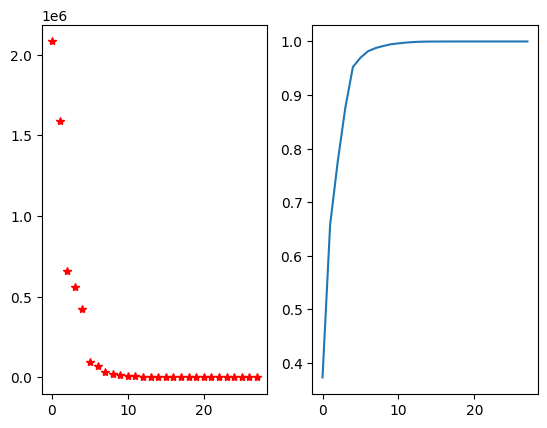

In [20]:
test = PCA(2)
Y, v, w = test.fit(train[0][0])
plt.subplot(1,2,1)
plt.plot(w, marker = '*', linestyle = '', color = 'r')
plt.subplot(1,2,2)
plt.plot(np.cumsum(w) / np.sum(w))